<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Utilice este espacio para escribir el código.

## Se carga el archivo
df = pd.read_csv('data/datos_clientes.csv')
df.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


*Procedimiento:*
1. Se importanlas librerías de `pandas`, `numpy`, `seaborn` y `matplotlib`.
2. Se guarda la información en un dataframe llamado `df`.

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [4]:
# Utilice este espacio para escribir el código.
## Se procede a realizar un analisis descriptivo de la información
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id_Cliente,200.0,100.5000,57.879185,1.00,50.7500,100.50,150.250,200.00
Edad,200.0,38.8500,13.969007,18.00,28.7500,36.00,49.000,70.00
Ingreso,200.0,60624.4466,26262.903416,13458.02,41512.7875,60777.96,77143.865,138584.52
Puntaje_Gasto,200.0,50.2000,25.823522,1.00,34.7500,50.00,73.000,99.00


Se verifican las vairables númericas donde se puede identificar el número de datos sus valores mínimos y máximos junto con el promedio.

In [5]:

correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

,Id_Cliente,Edad,Ingreso,Puntaje_Gasto
Id_Cliente,1.000000,-0.007309,-0.103862,0.012120
Edad,-0.007309,1.000000,-0.007701,-0.327227
Ingreso,-0.103862,-0.007701,1.000000,0.008821
Puntaje_Gasto,0.012120,-0.327227,0.008821,1.000000


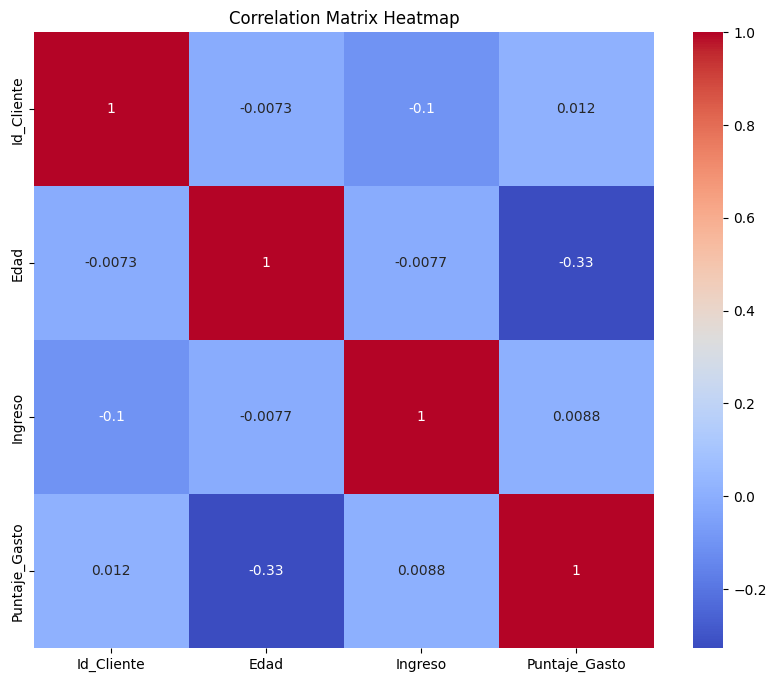

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Se realiza una verificación rápida de la correlación entre las variables clasificadas como númericas. Como se puede identificar existe una fuerte relación inversa entre el Puntaje_Gasto y la Edad. 

Para continuar con el analisis de la información se procede a cambiar la clasificación de las edades en grupos etarios (como solicita el ejercicio)

In [7]:
# Se definen los límites inferiores de cada grupo etario
bins = [18, 25, 35, 45, 55, 65, float('inf')]

# Se definen las etiquetas para cada grupo
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Utiliza la función cut para crear una nueva columna 'Grupo_Etario'
df['Grupo_Etario'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

df.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Etario
0,1,Mujer,41,98115.05,39,35-44
1,2,Mujer,20,35458.14,75,18-24
2,3,Mujer,68,59872.08,55,65+
3,4,Hombre,63,48508.93,51,55-64
4,5,Mujer,31,44431.11,54,25-34


Una vez definido esta nuevas agrupaciones se verifica si existen relaciones entre ellas que puedan ser estadisticamente significativas. Con este obejtivo en mente se procede a:

1. Graficar la relación que existe entre genero y el puntaje de gastos e ingresos

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


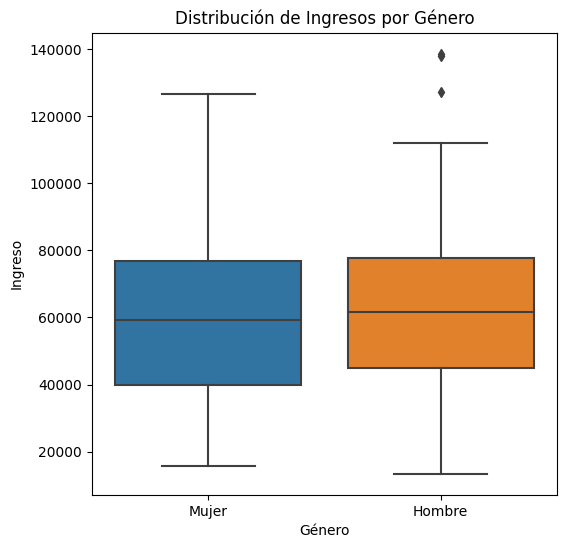

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


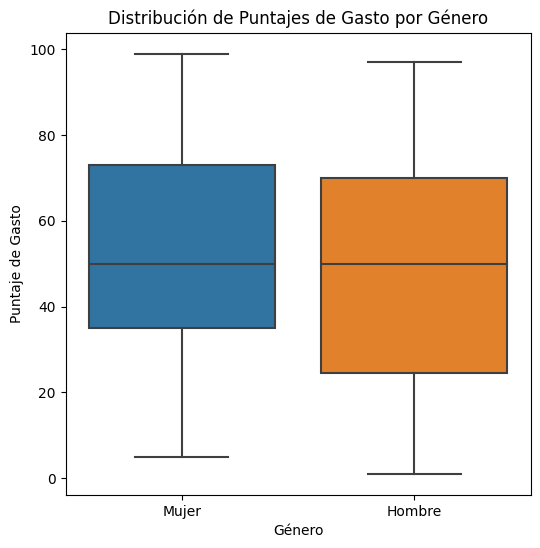

In [8]:
# Gráfico de caja para ingresos por género
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Genero', y='Ingreso')
plt.title('Distribución de Ingresos por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso')
plt.show()

# Gráfico de caja para puntajes de gasto por género
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Genero', y='Puntaje_Gasto')
plt.title('Distribución de Puntajes de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje de Gasto')
plt.show()

2. Verificar la relación que existe entre los gupos etarios y los ingresos y puntajes de gasto

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


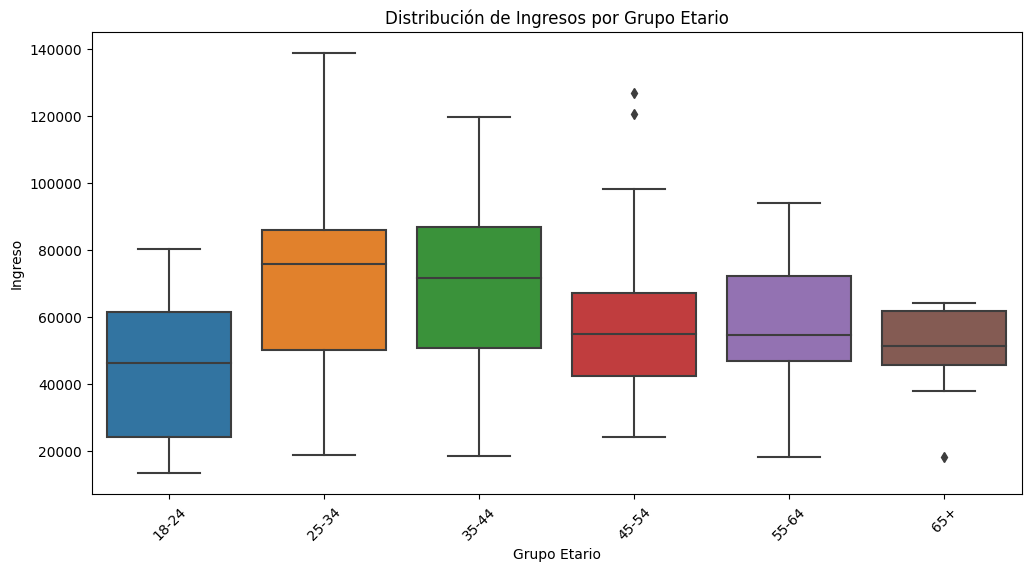

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


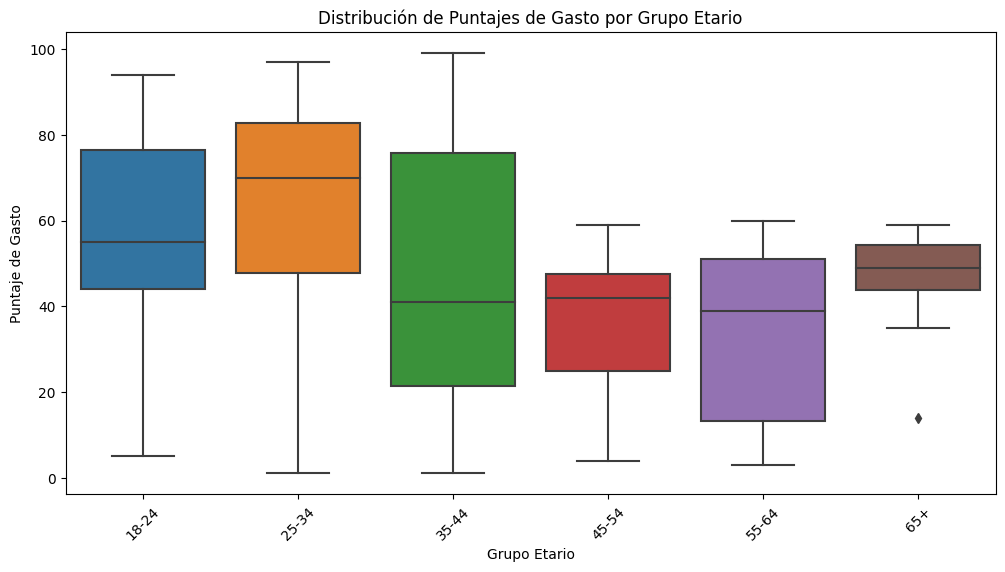

In [9]:
# Gráfico de caja para ingresos por grupos etarios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grupo_Etario', y='Ingreso')
plt.title('Distribución de Ingresos por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.show()

# Gráfico de caja para puntajes de gasto por grupos etarios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grupo_Etario', y='Puntaje_Gasto')
plt.title('Distribución de Puntajes de Gasto por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Puntaje de Gasto')
plt.xticks(rotation=45)
plt.show()

3. Una verificación de la relación conjunta que existe entre las cuatro variables.

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:

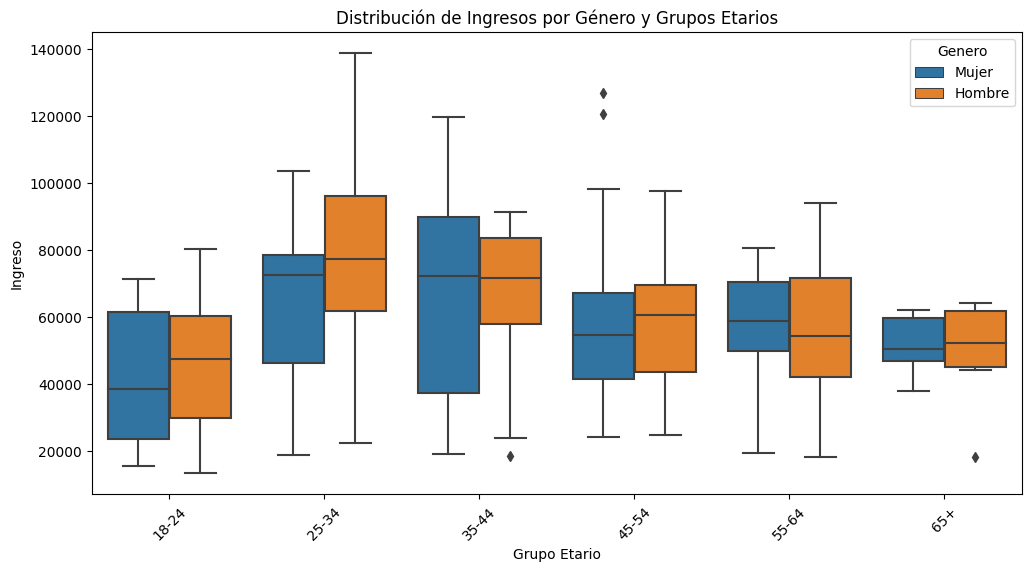

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:

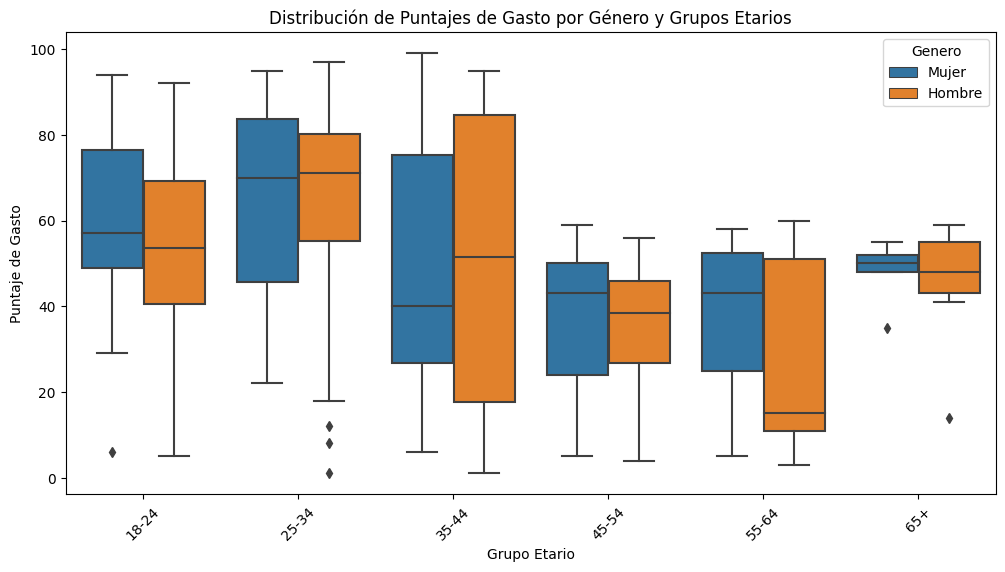

In [10]:
# Gráficos de caja para ingresos por género y grupos etarios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grupo_Etario', y='Ingreso', hue='Genero')
plt.title('Distribución de Ingresos por Género y Grupos Etarios')
plt.xlabel('Grupo Etario')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.show()

# Gráficos de caja para puntajes de gasto por género y grupos etarios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grupo_Etario', y='Puntaje_Gasto', hue='Genero')
plt.title('Distribución de Puntajes de Gasto por Género y Grupos Etarios')
plt.xlabel('Grupo Etario')
plt.ylabel('Puntaje de Gasto')
plt.xticks(rotation=45)
plt.show()

Como se puede observar en la gráfica parecen existir diferencias significativas entre los gastos e ingresos respecto a al genero y los grupos etarios. Para verificar si esta relación es significativas se procede a aplicar las siguientes pruebas:

1. En el caso de la relación entre genero e ingresos se procede a dar uso de la prueba-t ya que "Una prueba t es una prueba estadística que se utiliza para comparar las medias de dos grupos. A menudo se utiliza en pruebas de hipótesis para determinar si un proceso o tratamiento realmente tiene un efecto en la población de interés o si dos grupos son diferentes entre sí" (Fuente: https://www.scribbr.com/statistics/t-test/) Con base en lo anterior se procede a desarrollar esta prueba dando uso de la librería scipy.

In [11]:
from scipy import stats

# Prueba t para ingresos por género
t_statistic_income, p_value_income = stats.ttest_ind(df[df['Genero'] == 'Hombre']['Ingreso'], df[df['Genero'] == 'Mujer']['Ingreso'])

# Prueba t para puntajes de gasto por género
t_statistic_score, p_value_score = stats.ttest_ind(df[df['Genero'] == 'Hombre']['Puntaje_Gasto'], df[df['Genero'] == 'Mujer']['Puntaje_Gasto'])

print("Prueba t para ingresos - Estadística t:", t_statistic_income, "Valor p:", p_value_income)
print("Prueba t para puntajes de gasto - Estadística t:", t_statistic_score, "Valor p:", p_value_score)

Prueba t para ingresos - Estadística t: 0.7161502474144456 Valor p: 0.474742358200534
Prueba t para puntajes de gasto - Estadística t: -0.8190464150660334 Valor p: 0.4137446589852174


Con base en estos resultados se puede concluir que:
- Para el caso de género e ingresos dando uso de la la "Prueba t para ingresos", el valor p de aproximadamente 0.475 es mayor que el nivel de significancia de 0.05 (que se eligio porque es el más usado). Esto sugiere que no hay evidencia suficiente para concluir que existen diferencias significativas en ingresos entre hombres y mujeres.
- Para el caso de género y puntaje de gasto dando usa a la "Prueba t para puntajes de gasto", el valor p de aproximadamente 0.414 también es mayor que 0.05, lo que indica que no hay evidencia suficiente para concluir que existen diferencias significativas en los puntajes de gasto entre hombres y mujeres en los datos.

2. En el caso de los grupos etarios como se cuenta con una variable categorica con más de dos grupos se procede a usar el test ANOVA para determinar si existe una diferencia estadisticamente significativa entre los grupos (Fuente: https://www.scribbr.com/statistics/one-way-anova/) Se procede a dar uso nuevamente a la libreria scipy:

In [12]:
# ANOVA para ingresos por grupos etarios
f_statistic_income, p_value_income = stats.f_oneway(df[df['Grupo_Etario'] == '18-24']['Ingreso'],
                                                    df[df['Grupo_Etario'] == '25-34']['Ingreso'],
                                                    df[df['Grupo_Etario'] == '35-44']['Ingreso'],
                                                    df[df['Grupo_Etario'] == '45-54']['Ingreso'],
                                                    df[df['Grupo_Etario'] == '55-64']['Ingreso'],
                                                    df[df['Grupo_Etario'] == '65+']['Ingreso'])

# ANOVA para puntajes de gasto por grupos etarios
f_statistic_score, p_value_score = stats.f_oneway(df[df['Grupo_Etario'] == '18-24']['Puntaje_Gasto'],
                                                  df[df['Grupo_Etario'] == '25-34']['Puntaje_Gasto'],
                                                  df[df['Grupo_Etario'] == '35-44']['Puntaje_Gasto'],
                                                  df[df['Grupo_Etario'] == '45-54']['Puntaje_Gasto'],
                                                  df[df['Grupo_Etario'] == '55-64']['Puntaje_Gasto'],
                                                  df[df['Grupo_Etario'] == '65+']['Puntaje_Gasto'])

print("ANOVA para ingresos - Estadística F:", f_statistic_income, "Valor p:", p_value_income)
print("ANOVA para puntajes de gasto - Estadística F:", f_statistic_score, "Valor p:", p_value_score)

ANOVA para ingresos - Estadística F: 6.019746307189062 Valor p: 3.336261060489043e-05
ANOVA para puntajes de gasto - Estadística F: 8.258289721310666 Valor p: 4.295829973020038e-07


Se puede observar que:
- Para la ANOVA relizada para los ingresos el p-value tiene un valor por debajo del 0.05 lo cual lo hace estadisticamente significativo.
- Para el ANOVA para el puntaje de gasto el p-value también se encuentra por debajo de 0.05 lo que lo hace estadisticamente significativo.

Esto quiere decir que al menos un grupo etario se diferencia significativamente en términos de ingresos y puntajes de gasto en comparación con los otros grupos.

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

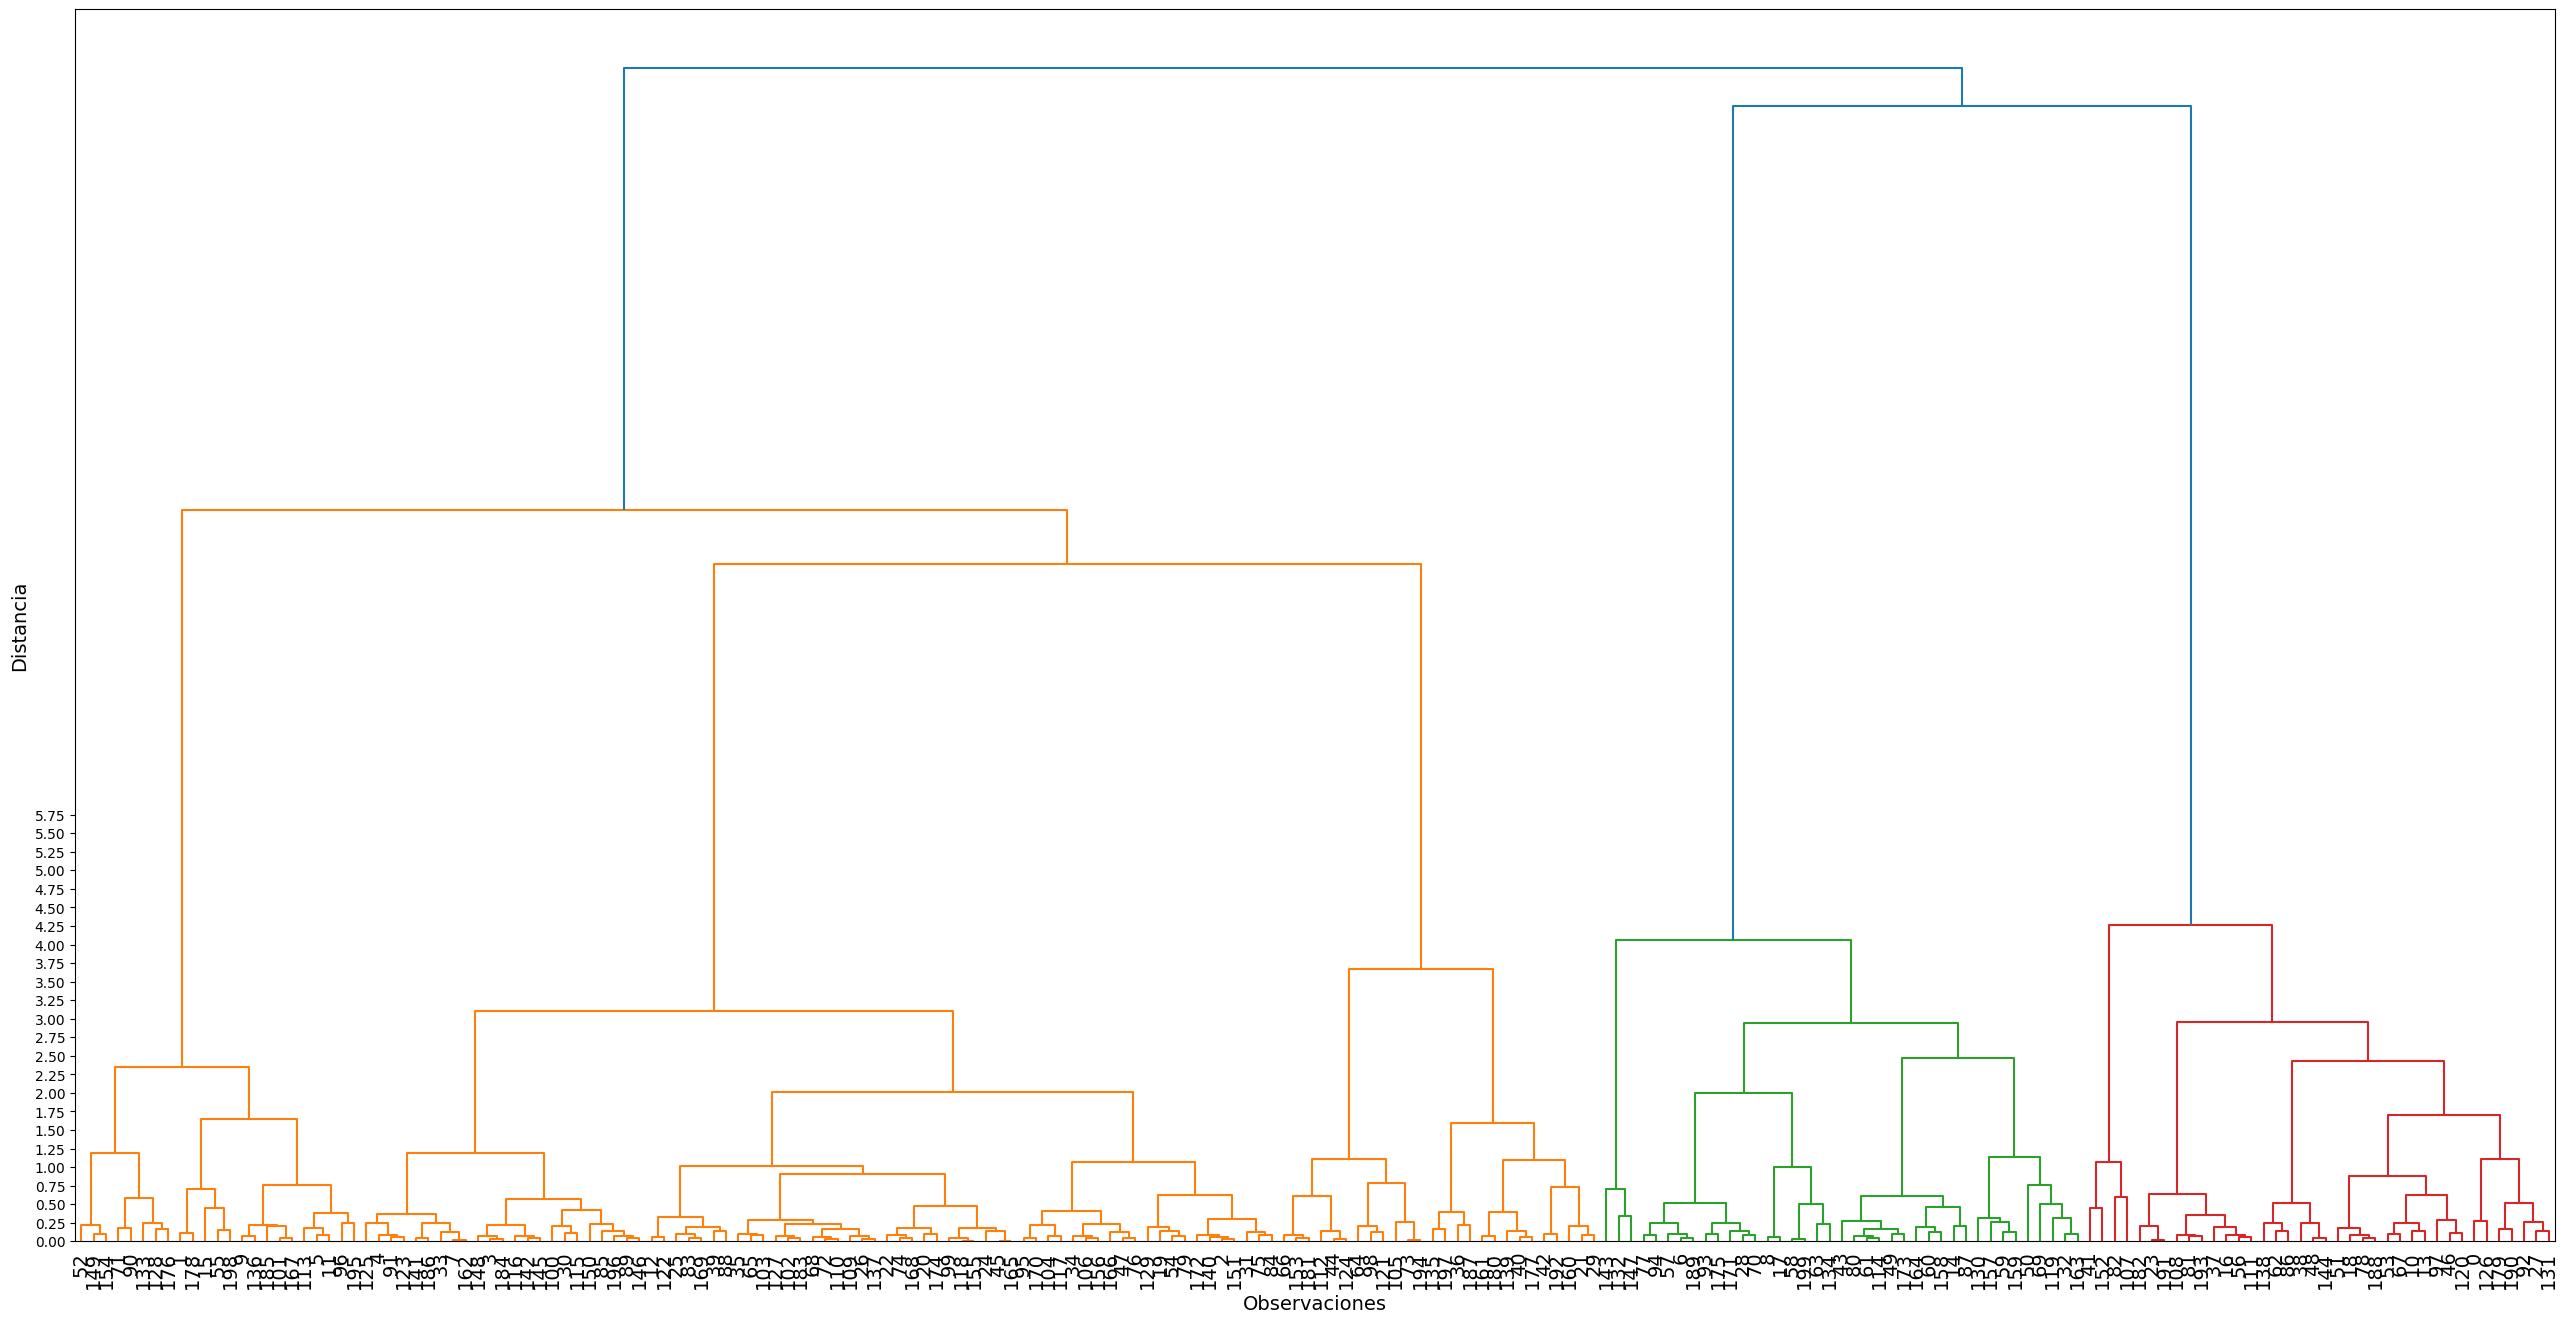

In [13]:
## Se cargan las librerias necesarias
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

## Se estandarizan las variables Ingreso y Puntaje_gasto

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Ingreso', 'Puntaje_Gasto']])

## Se eleccionan en X
X = scaled_data


## Se procede a usar ward y la distancia ecludiana

dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')

## Se procede a gráficar

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(32, 16))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 6, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

*Procedimiento:*

1.	Cargamos las librerías necesarias para el proceso como lo es scipy spatial distance, cluster hierarchy y preprocessing de sklearn.
2.	Estandarizamos las variables de ingreso y puntaje
3.	Seleccionamos en X con scaled_data
4.	Hacemos un Ward y distancia ecludiana por medio del método pdist y linkage
5.	Graficamos 

*Análisis y conclusiones:*

1.	De estos pasos iniciales podemos resaltar las observaciones y las distancias sugeridas en el gráfico resultado. El gráfico es claro en mostrar una división de 4 clusters principales y de la división entre ellos de forma jerarquica. Sin embargo, como se plantea en clase, es necesario realizar una nueva metodología para un análisis profundo.

*Importancia de estandarizar los datos:*

- Es importante estandarizar los datos para garantizar que todas las variables tengan la misma escala, lo que ayuda a que los algoritmos de clustering funcionen de manera eficaz y produzcan resultados significativos.

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

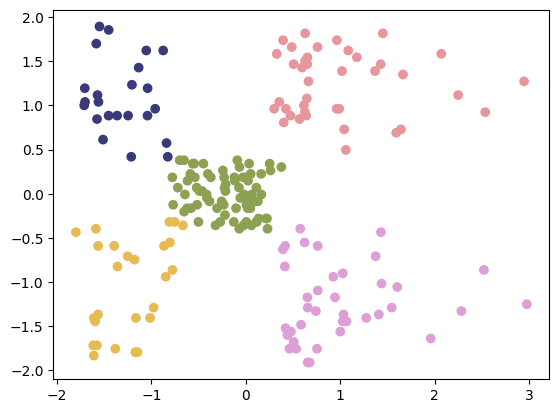

In [14]:
## Se fija la distancia en 6
clusters = fcluster(Z, 6, criterion="distance")

## Se grafican para observarlos
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
plt.show()

*Procedimiento:*

1.	Conservamos la instrucción sobre retener el número de clusters y hacer una fijación de distancia de 6.
2.	Fijamos la distancia en 6 por medio del método fcluster.
3.	Hacemos la gráfica de scatter plot para poder hacer la visualización del comportamiento de los clusters.

*Análisis y conclusiones:*

-	Entre los 5 clusters identificados en la base de datos de clientes sobre marketing podemos ver que el grupo rosado son los que más se alejan en el eje `y` y `x`. De la misma forma, el grupo que más se acerca al punto -2.0 y -2 es el grupo amarillo.

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


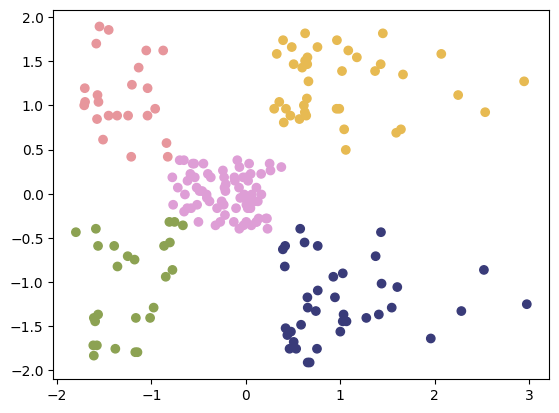

In [15]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import AgglomerativeClustering

cluster_sk = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_sk =cluster_sk.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=cluster_sk, cmap='tab20b')
plt.show()

In [16]:
# Agregar la columna 'Cluster' al DataFrame original
df['Cluster'] = cluster_sk

# Describir los grupos encontrados
for i in range(0, 5):
    grupo = df[df['Cluster'] == i]
    print(f"Grupo {i + 1}:")
    print(grupo.describe())
    print("\n")

Grupo 1:
       Id_Cliente       Edad        Ingreso  Puntaje_Gasto  Cluster
count   38.000000  38.000000      38.000000      38.000000     38.0
mean    90.000000  40.394737   87055.074474      18.631579      0.0
std     58.733019  11.376931   16200.102296      10.915947      0.0
min      1.000000  19.000000   70888.720000       1.000000      0.0
25%     43.250000  34.000000   75765.510000      10.250000      0.0
50%     82.500000  41.500000   80570.395000      16.500000      0.0
75%    130.750000  47.000000   95988.570000      26.750000      0.0
max    194.000000  59.000000  138584.520000      40.000000      0.0


Grupo 2:
       Id_Cliente       Edad       Ingreso  Puntaje_Gasto  Cluster
count   26.000000  26.000000     26.000000      26.000000     26.0
mean   117.576923  44.115385  28274.667308      23.307692      1.0
std     59.581321  13.094509   8998.503308      13.959281      0.0
min     22.000000  19.000000  13458.020000       3.000000      1.0
25%     65.500000  35.000000  193

*Procedimiento:*
1. Se importa la librería de `sklearn` para usar el algoritmo jerárquico aglomerativo.
2. Se asegura el uso de los parámetros de affinity a `euclidean` y linkage a `ward`.
3. Se grafica para validar la conformación de los clústers.
4. Se crea un ciclo para mostrar las estadísticas de caa grupo o clúster.

*Análisis y conclusiones:*

* La estrategia de marketing podría aplicar para los grupos `3` y `4` considerando que sus puntajes de gasto promedio son de 82 y 78 respectivamente (altos comparado con el resto de grupos, y los más cercanos a 100). Si bien el grupo `3` es bastante llamativo por no solo contar con un puntaje de gasto alto sino también un nivel de ingresos promedio de 86.500, no se debería dejar a un lado los grupos `4` ni `1`, dado que el número 4 son susceptibles al gasto, y el grupo 1 tiene un muy buen nivel de ingresos, por lo cual la estrategia de marketing puede centrarse en cómo impulsar su nivel de gasto a través de pautas llamativas.

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Ingreso', 'Puntaje_Gasto']])

## Se eleccionan en X
X = scaled_data

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

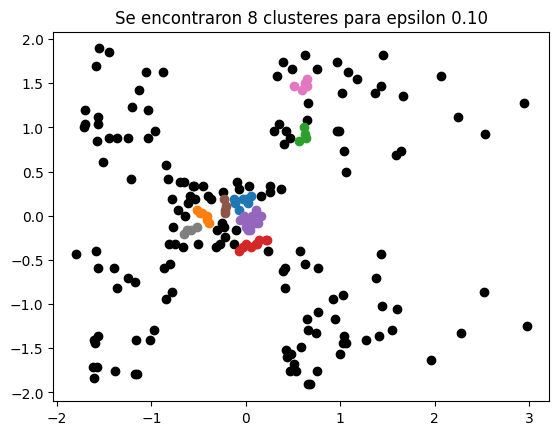

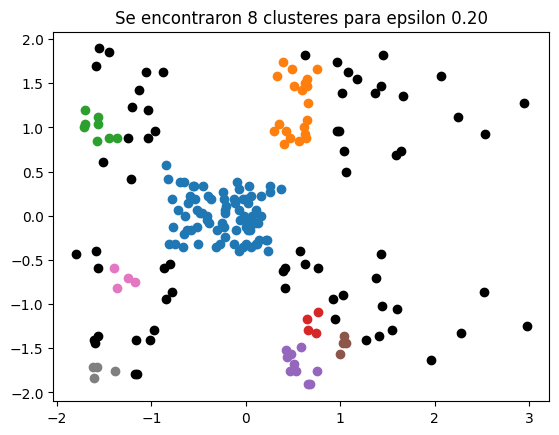

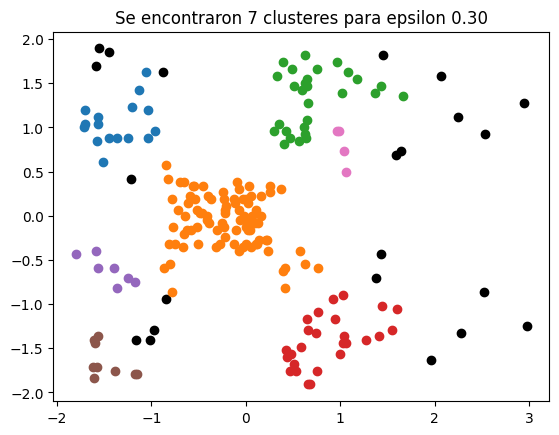

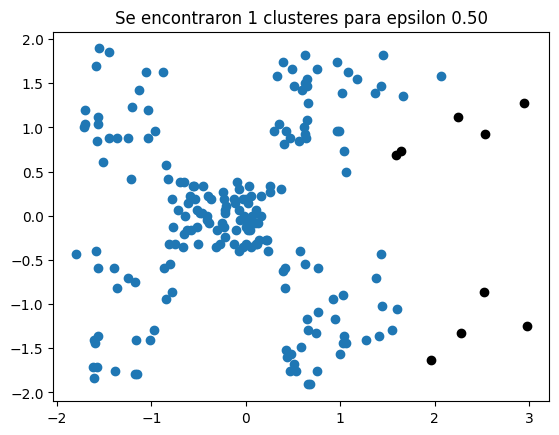

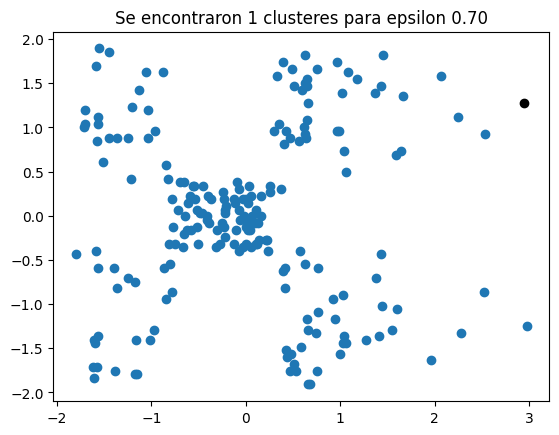

In [51]:
for e in [0.1, 0.2, 0.3, 0.5, 0.7]:
    db = DBSCAN(eps = e, min_samples = 4).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, e))

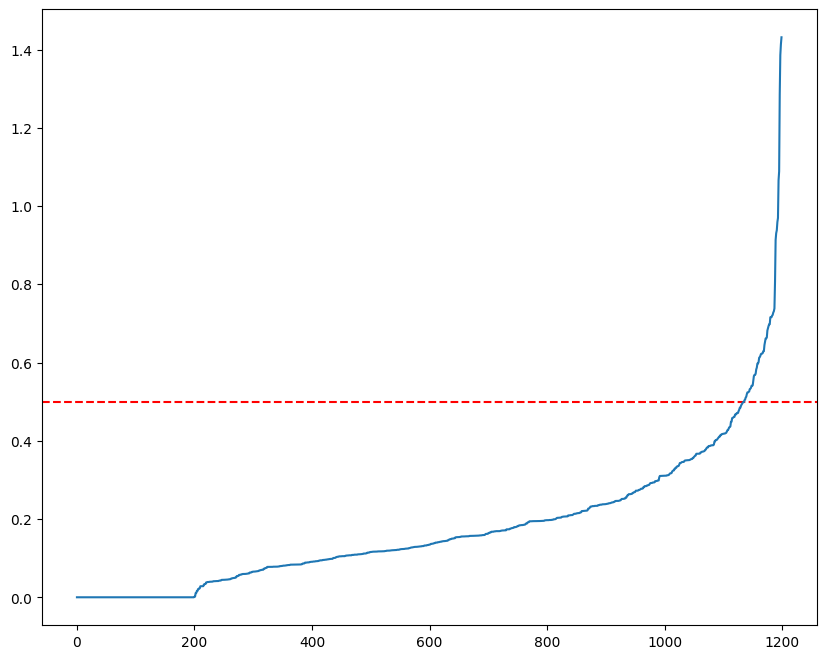

In [63]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 6)
nbrs = neigh.fit(X)
distancias, indices = nbrs.kneighbors(X)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

In [64]:
from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

0.3517592078443737


Text(0.5, 1.0, 'Se encontraron 5 clusteres para epsilon 0.35')

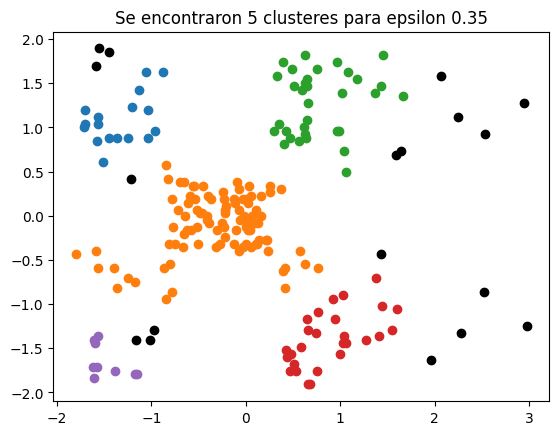

In [66]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.3517, min_samples = 4).fit(X)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.3517))

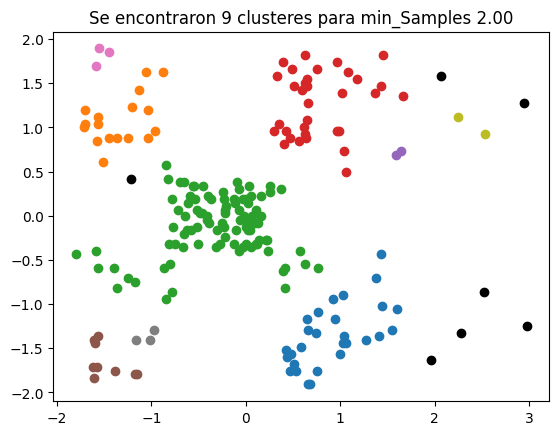

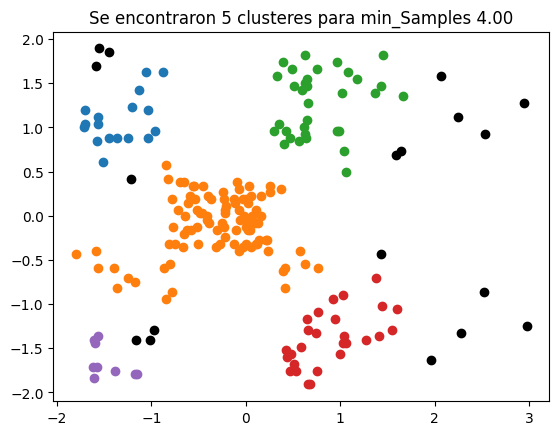

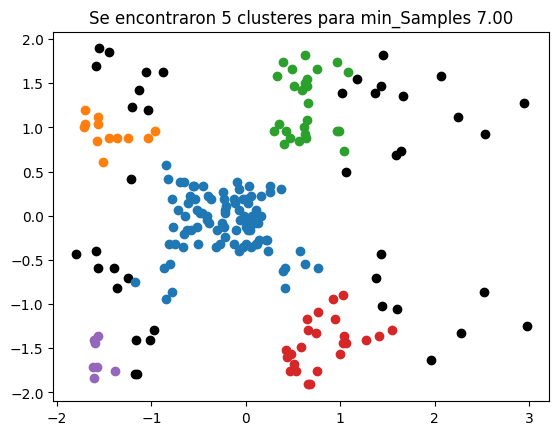

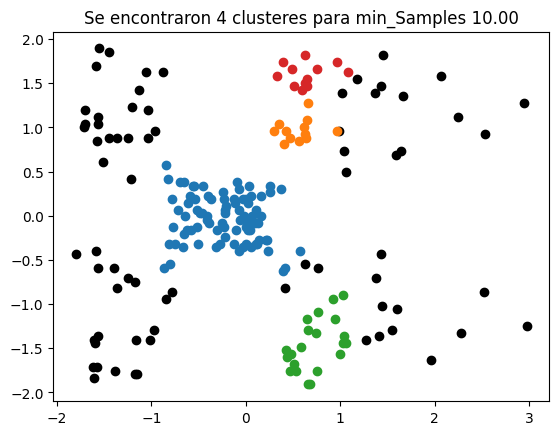

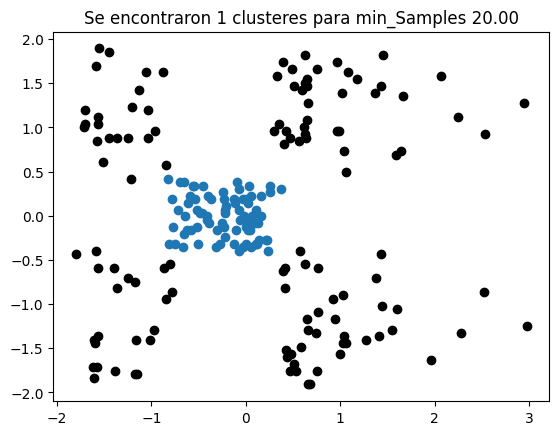

In [74]:
for minpts in [2, 4, 7, 10, 20]:
    db = DBSCAN(eps = 0.3517, min_samples = minpts).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, minpts))

In [72]:
db = DBSCAN(eps = 0.3517, min_samples = 4).fit(X)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(df).assign(Cluster = clusteres)
resultado

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Etario,Cluster,Genero_factor,Grupo_Etario_factor
0,1,Mujer,41,98115.05,39,35-44,-1,0,0
1,2,Mujer,20,35458.14,75,18-24,0,0,1
2,3,Mujer,68,59872.08,55,65+,1,0,2
3,4,Hombre,63,48508.93,51,55-64,1,1,3
4,5,Mujer,31,44431.11,54,25-34,1,0,4
...,...,...,...,...,...,...,...,...,...
195,196,Mujer,30,19322.17,72,25-34,0,0,4
196,197,Mujer,50,43486.37,45,45-54,1,0,5
197,198,Hombre,35,24086.95,35,35-44,1,1,0
198,199,Mujer,24,38599.28,65,18-24,1,0,1


In [73]:
for i in range(0, 5):
    grupo = df[df['Cluster'] == i]
    print(f"Grupo {i + 1}:")
    print(grupo.describe())
    print("\n")

Grupo 1:
       Id_Cliente       Edad        Ingreso  Puntaje_Gasto  Cluster  \
count   38.000000  38.000000      38.000000      38.000000     38.0   
mean    90.000000  40.394737   87055.074474      18.631579      0.0   
std     58.733019  11.376931   16200.102296      10.915947      0.0   
min      1.000000  19.000000   70888.720000       1.000000      0.0   
25%     43.250000  34.000000   75765.510000      10.250000      0.0   
50%     82.500000  41.500000   80570.395000      16.500000      0.0   
75%    130.750000  47.000000   95988.570000      26.750000      0.0   
max    194.000000  59.000000  138584.520000      40.000000      0.0   

       Genero_factor  Grupo_Etario_factor  
count      38.000000            38.000000  
mean        0.526316             2.526316  
std         0.506009             2.076078  
min         0.000000             0.000000  
25%         0.000000             0.000000  
50%         1.000000             3.000000  
75%         1.000000             4.000000  

*Procedimiento:*

1. Se estandariza el df con `Ingreso` y `Puntaje_Gasto`, dando como resultado `X`.
2. Se itera sobre una lista de eps, para conocer visualmente como se comporta el DBSCAN sobre un min_camples igual a 4.
3. Utilizando el método de Rahmah y Sukaesih, se obtiene el mejor valor de eps.
4. Sobre el eps obtenido, se itera sobre una lista de min_samples para identificar visualmente el mejor valor.

*Análisis y Conclusiones:*

* El mejor valor de eps es 0.3517 y un min_samples de 4. Este min_samples coincide con la teoría donde el sugerido está parametrizado como 4 para un dataset de dos dimensiones.
* En términos de la estrategia de marketing, se encontraron 5 clusteres, las características de los cluster son similares a las obtenidas en la sección anterior, donde para los grupos `3` y `4` los puntajes de gasto promedio son de 82 y 78 respectivamente (altos comparado con el resto de grupos, y los más cercanos a 100). Y el grupo `3` sigue siendo bastante llamativo por no solo contar con un puntaje de gasto alto sino también un nivel de ingresos promedio de 86.500. En otras palabras se mantendría la estrategia de marketing.

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [78]:
scaler = StandardScaler()
Genero_num, Genero_unicos = pd.factorize(df['Genero'])
df['Genero_factor'] = Genero_num
Grupo_num, Grupo_unicos = pd.factorize(df['Grupo_Etario'])
df['Grupo_Etario_factor'] = Grupo_num
dic_Genero = dict(zip(Genero_num, Genero_unicos))
dic_Grupo = dict(zip(Grupo_num, Grupo_unicos))
scaled_data = scaler.fit_transform(df[['Ingreso', 'Puntaje_Gasto', 'Genero_factor', 'Grupo_Etario_factor']])
X = scaled_data


C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

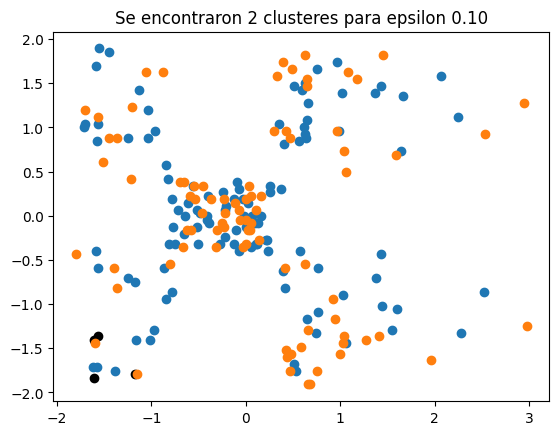

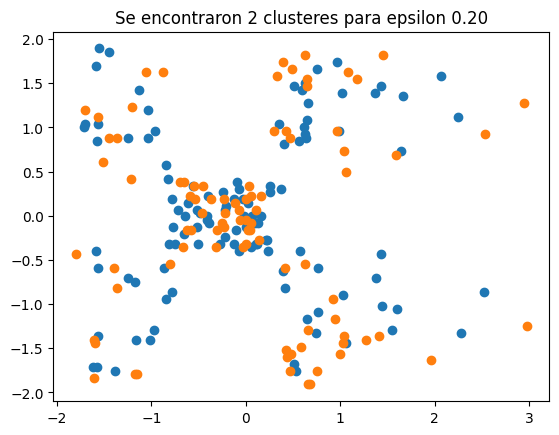

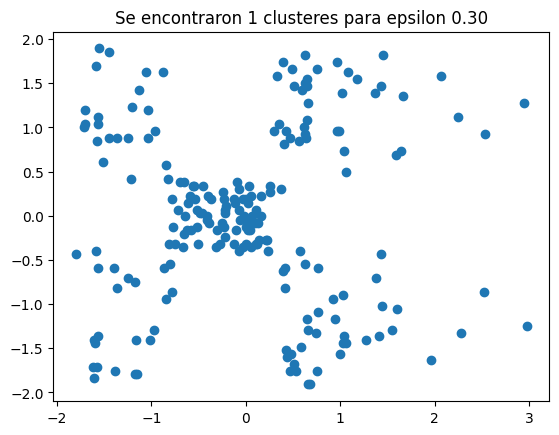

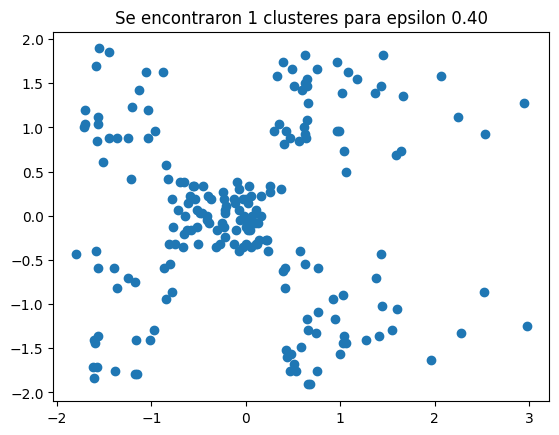

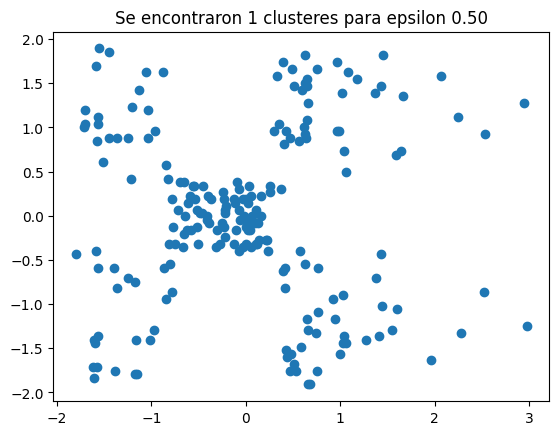

In [103]:
from gower import gower_matrix
gower_dist_matrix = gower_matrix(X)
for e in [0.1, 0.2, 0.3, 0.4, 0.5]:
    db = DBSCAN(eps = e, min_samples = 4, metric = 'precomputed').fit(gower_dist_matrix)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, e))

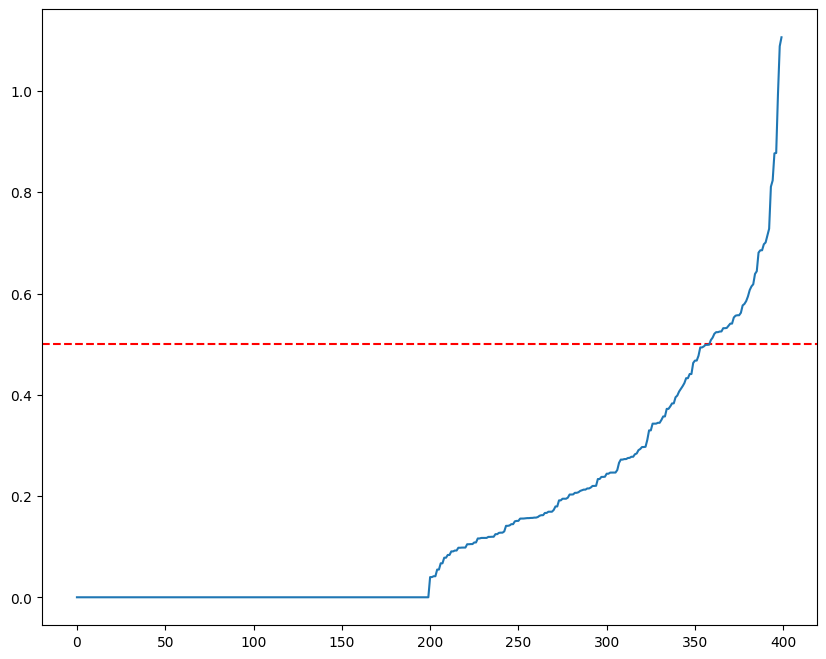

In [112]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)
distancias, indices = nbrs.kneighbors(X)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

In [111]:
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

0.1508762558470209


Text(0.5, 1.0, 'Se encontraron 2 clusteres para epsilon 0.15')

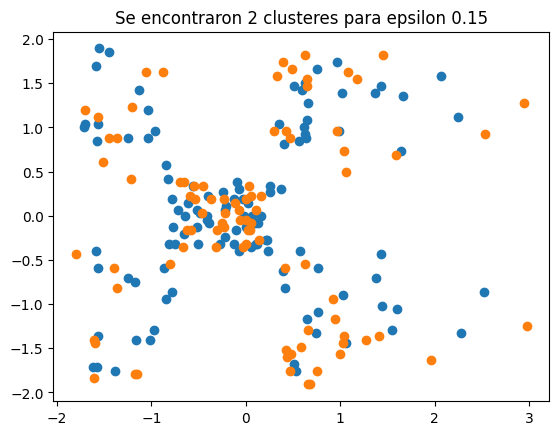

In [113]:
db = DBSCAN(eps = 0.15, min_samples = 4, metric='precomputed').fit(gower_dist_matrix)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.15))

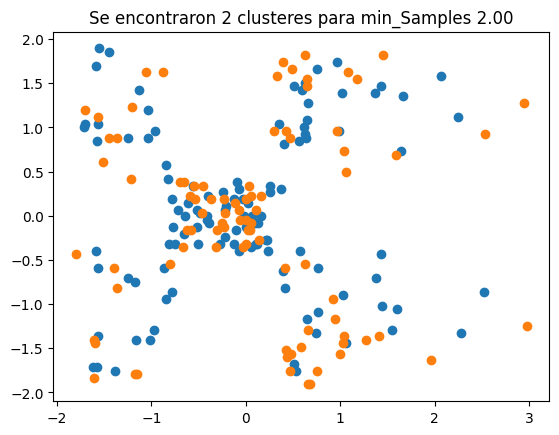

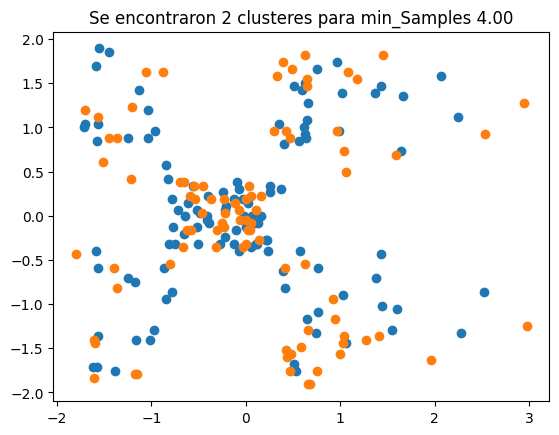

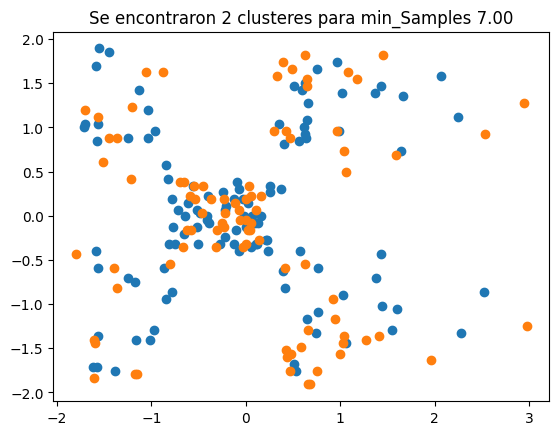

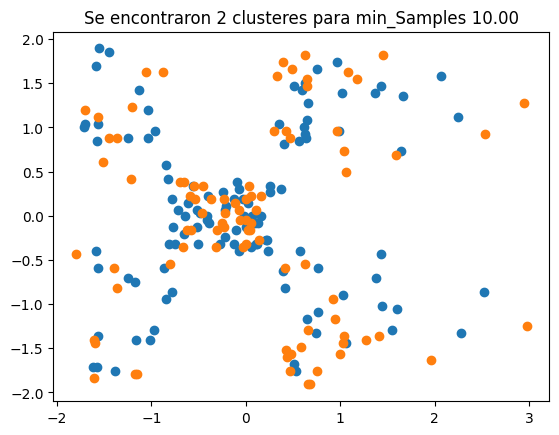

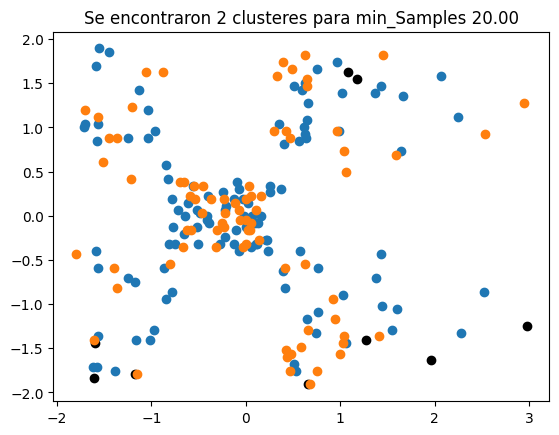

In [114]:
for minpts in [2, 4, 7, 10, 20]:
    db = DBSCAN(eps = 0.15, min_samples = minpts, metric='precomputed').fit(gower_dist_matrix)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, minpts))

In [116]:
db = DBSCAN(eps = 0.15, min_samples = 8, metric = 'precomputed').fit(gower_dist_matrix)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(df).assign(Cluster = clusteres)
resultado

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Etario,Cluster,Genero_factor,Grupo_Etario_factor
0,1,Mujer,41,98115.05,39,35-44,0,0,0
1,2,Mujer,20,35458.14,75,18-24,0,0,1
2,3,Mujer,68,59872.08,55,65+,0,0,2
3,4,Hombre,63,48508.93,51,55-64,1,1,3
4,5,Mujer,31,44431.11,54,25-34,0,0,4
...,...,...,...,...,...,...,...,...,...
195,196,Mujer,30,19322.17,72,25-34,0,0,4
196,197,Mujer,50,43486.37,45,45-54,0,0,5
197,198,Hombre,35,24086.95,35,35-44,1,1,0
198,199,Mujer,24,38599.28,65,18-24,0,0,1


In [117]:
for i in range(0, 2):
    grupo = df[df['Cluster'] == i]
    print(f"Grupo {i + 1}:")
    print(grupo.describe())
    print("\n")

Grupo 1:
       Id_Cliente       Edad        Ingreso  Puntaje_Gasto  Cluster  \
count   38.000000  38.000000      38.000000      38.000000     38.0   
mean    90.000000  40.394737   87055.074474      18.631579      0.0   
std     58.733019  11.376931   16200.102296      10.915947      0.0   
min      1.000000  19.000000   70888.720000       1.000000      0.0   
25%     43.250000  34.000000   75765.510000      10.250000      0.0   
50%     82.500000  41.500000   80570.395000      16.500000      0.0   
75%    130.750000  47.000000   95988.570000      26.750000      0.0   
max    194.000000  59.000000  138584.520000      40.000000      0.0   

       Genero_factor  Grupo_Etario_factor  
count      38.000000            38.000000  
mean        0.526316             2.526316  
std         0.506009             2.076078  
min         0.000000             0.000000  
25%         0.000000             0.000000  
50%         1.000000             3.000000  
75%         1.000000             4.000000  

*Procedimiento:*

1. Se estandariza el df con `Ingreso`, `Puntaje_Gasto`, `Genero` y `Grupo_Etario` dando como resultado `X`.
2. Se importa la librería `gower` para obtener la matriz de distancias gower.
3. Se itera sobre una lista de eps, para conocer visualmente como se comporta el DBSCAN sobre un min_camples igual a 4 y una metrica `precomputed` basada en la matriz de distancias de gower.
4. Utilizando el método de Rahmah y Sukaesih, se obtiene el mejor valor de eps.
5. Sobre el eps obtenido, se itera sobre una lista de min_samples para identificar visualmente el mejor valor.

*Análisis y Conclusiones:*

* El mejor valor de eps es 0.15 y un min_samples de 8. Este min_samples coincide con la teoría donde el sugerido está parametrizado como 2*dim para un dataset de 4 dimensiones.
* En términos de la estrategia de marketing, se encontraron 2 clusteres, es decir, la estrategia de marketing es más focalizada. Si se analizan las medias de `Ingreso`, `Puntaje_Gasto`, `Genero` y `Grupo_Etario` se puede observar que la distinción claramente está sobre los ingresos, dividiendo el dataset en dos clusteres donde el primero tiene media de ingreso de 87mil y el segundo tiene una media de ingreso de 28mil.